# Spectrograph Design Calculator

References : <br>
Astronomical Optics : D. J. Schroeder <br>
James Larkin: Line density Calculations <br>
Nick Konidaris coffeemaker code http://nickkonidaris.github.io/ <br>
<br>
contact: arunsuryaoffice@gmail.com

In [25]:
from ipywidgets import widgets
from IPython.display import Markdown, display
from ipywidgets import Button, Layout
import numpy as np
style = {'description_width': 'initial'}
def printmd(string):
    display(Markdown(string))
    

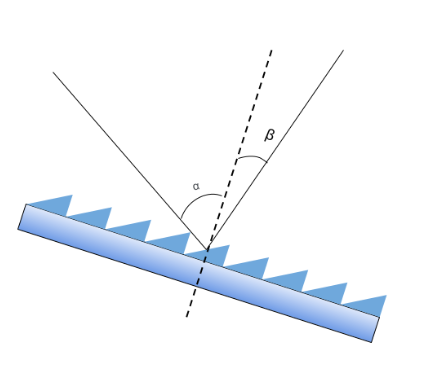

## Sign Convention 

Sign convention is such that **opening angle $\theta = \alpha + \beta$** as shown in the figure

### $\beta = \tan^{-1}\left[\frac{\sin(\theta)-\frac{2.l.R}{m.f_{cam}}}{1+\cos(\theta)}\right]$

where<br>
$l$ is the pixel size <br>
$R$ is the Resolution <br>
$m$ is the Grating Order <br>
$f_{cam}$ Camera focal length <br>

and <br>

### $\frac{1}{\sigma}=\frac{2.l.R.\cos(\beta)}{m.f_{cam}.\lambda}$

In [26]:
def ret_beta_sigma(theta_text,R,m_text,flencam_text,pixel_sz_text,lamcen_text):

    theta = float(theta_text) 
    m = int(m_text) 
    flencam=float(flencam_text)*1000
    pixel_sz=float(pixel_sz_text)
    lamcen=float(lamcen_text)
    
    

    
    
    theta_rad=theta*np.pi/180 
    beta_rad=np.arctan((np.sin(theta_rad)-((2*pixel_sz*R)/(m*flencam)))/(1+np.cos(theta)))
    beta=beta_rad*(180/np.pi)
    sigma=(m*flencam*lamcen)/(2*pixel_sz*R*np.cos(beta_rad))
    lineden=(1/sigma)*1000
    st=r"# alpha = "+"{:.2f}".format(theta-beta)+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+r" beta = "+"{:.2f}".format(beta)+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+" lines p mm = "+"{:.2f}".format(lineden)
    printmd(st)    
    
    return

int_wid = widgets.interact(
    ret_beta_sigma, 
    theta_text=widgets.Text(value='45',description='Opening Angle (degree)',style=style,layout=Layout(width='50%')), 
    m_text=widgets.Text(value='1',description='grating order',style=style,layout=Layout(width='50%')),
    R=widgets.IntSlider(value=4000,min=50,max=10000,step=1,description='R',style=style,layout=Layout(width='50%')),
    flencam_text=widgets.Text(value='355',description='Camera focal length (mm)',style=style,layout=Layout(width='50%')),
    pixel_sz_text=widgets.Text(value='15',description='Pixel Size (microns)',style=style,layout=Layout(width='50%')),
    lamcen_text=widgets.Text(value='1.6',description='Center wavelength (microns)',style=style,layout=Layout(width='50%')),
)

interactive(children=(Text(value='45', description='Opening Angle (degree)', layout=Layout(width='50%'), style…

## Considering seeing limited R with slit 

In [30]:
def Spectrograph(Tel_D,Tel_fratio,Beam_size,slit_width,slit_length,line_density,grating_order,center_wave,camera_fratio,pixel_size):

    tdiam = float(Tel_D) #Telescope Diameter
    tfratio = float(Tel_fratio) #Telescope Fratio
    
    beamw= Beam_size #mm
    slitwidth= float(slit_width) #arcsec
    slitlength= float(slit_length) #arcmin
    
    linden= line_density # lines/mm
    order=int(grating_order)
    lamcen=float(center_wave) # microns
    
    fratcam=float(camera_fratio) #Fratio Camera
    pixel_sz=int(15) #microns
    anamorph=1.3
    
    #Derived
    tefl=tdiam*tfratio #focal length m
    
    tpltscl= (tdiam*tfratio/206265) * 1000.0 # telescope platescale mm/as
    
    flencol= tfratio*beamw #focal length collimator mm
    
    beamffov= tdiam/(beamw/1000.) * slitlength/60 # Beam Angle (degree) for ffov
    
    slitlengthmm=(beamffov/57.3)*flencol  #slit length in mm
    
    dthetaw=slitwidth*tpltscl/flencol
    
    dlambda=dthetaw/(order*linden*1e-3)/anamorph
    
    R=lamcen/dlambda
    
    flencam=beamw*fratcam
        
    slit_width_det=flencam*dthetaw*1000/anamorph/pixel_sz# 
    
    st="# R = "+"{:.2f}".format(R)+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+" Slit Width (pixels) = "+"{:.2f}".format(slit_width_det)+""
    printmd(st)
    return 
 
kaka = widgets.interact(
    Spectrograph, 
    Tel_D=widgets.Text(value='5',description='Telescope Diameter (m)',style=style,layout=Layout(width='50%')), 
    Tel_fratio=widgets.Text(value='16',description='Telescope Fratio',style=style,layout=Layout(width='50%')),
    Beam_size=widgets.IntSlider(min=50,max=500,step=1,description='Beam Size (mm)',style=style,layout=Layout(width='50%')),
    slit_width=widgets.Text(value='1',description='Slit Width (arcsec)',style=style,layout=Layout(width='50%')),
    slit_length=widgets.Text(value='12',description='FOV: Long Slit length (arcmin)',style=style,layout=Layout(width='50%')),
    line_density=widgets.IntSlider(min=50,max=3000,step=1,description='Grating line density (lines/mm)',style=style,layout=Layout(width='50%')),
    grating_order=widgets.Text(value='1',description='Diffraction order',style=style,layout=Layout(width='50%')),
    center_wave=widgets.Text(value='.7',description='Central wavelength (Microns)',style=style,layout=Layout(width='50%')),
    camera_fratio=widgets.FloatSlider(value=2.0,min=0,max=3,step=.1,description='Camera Fratio',style=style,layout=Layout(width='50%')),
    pixel_size=widgets.Text(value='15',description='Pixel size (microns)',style=style,layout=Layout(width='50%')), 
)

interactive(children=(Text(value='5', description='Telescope Diameter (m)', layout=Layout(width='50%'), style=…